## Loading Required Packages

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Loading the datasets

In [2]:
mpi_national = pd.read_csv('MPI_national.csv')
mpi_subnation = pd.read_csv('MPI_subnational.csv')
netflix = pd.read_csv('netflix_titles.csv')

### Netflix TV Shows and Movies

####  What is the Average rating of Netflix Movie.

In [3]:
# Rating column is a categorical variable. Hence we cannot calculate numerical average
# We can do grading of categorical data & then can calculate numerical average. Not doing that step as am not sure of grades to give
# However we can do frequency analysis of rating & check mode and other stats

In [4]:
netflix['rating'].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [8]:
netflix['rating'].mode()
## TV-MA is mode of rating of netflix movies, meaning this rating is present in most common in Netflix

0    TV-MA
dtype: object

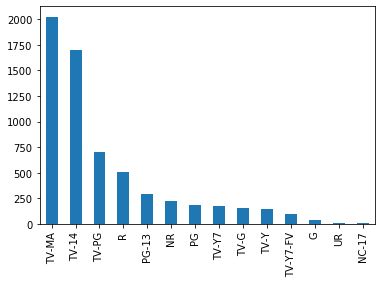

In [6]:
netflix['rating'].value_counts().plot(kind='bar')

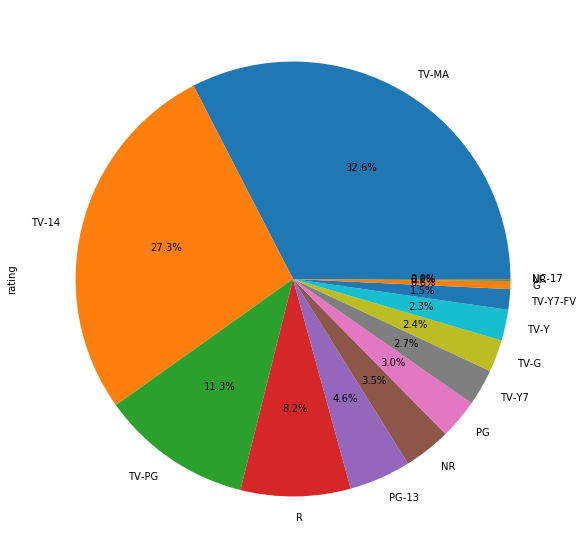

In [7]:
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10))

#### Is Avg Rating for Movies Higher than Avg Rating for TV Series.

In [9]:
# Based on above comments, I am just providing mode of netflix movie & TV series rating
netflix_movies = netflix[netflix['type']=='Movie']
netflix_tv = netflix[netflix['type']=='TV Show']

netflix_movies['rating'].mode() # TV-MA
netflix_tv['rating'].mode() # TV-MA
# Both movies and tv series have same most common rating in Netflix (TV-MA)

0    TV-MA
dtype: object

#### Are TV Series are more loved in comparison to Movies, If yes what is the Reason behind that.

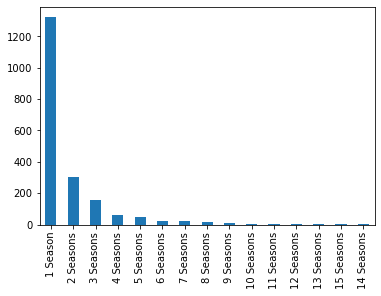

In [10]:
# Relevant data not present to prove this hypothesis. Dataset dooesn't specifies about any particular movie or tv series being loved more
# If relevant data was present, then based on exploratory data analysis, bi variate analysis this could have been verified

#4. Does Having an ensemble cast have an impact on the popularity of the show.
# Again relevant data not present. To prove this hypothesis, we should have data of popular and not so popular shows

#5. Does Audiences prefer a longer episode or a shorter episode, what is the scope of Short series?
# Again relevant data not present. To prove this hypothesis, we should have data of duration of TV shows and the data of popularity of TV shows
# Currently the duration of TV shows is just represented by number of seasons
netflix_tv['duration'].value_counts().plot(kind='bar')

#### Apart from the United States, which other States are Huge Viewers of Netflix.

In [12]:
countries = netflix['country']
countries = countries.dropna()
countries = countries.tolist()
countries_list = [x for xs in countries for x in xs.split(',')]
countries_list = [x.strip() for x in countries_list]
count = Counter(countries_list).most_common()
count
# Apart from United States, India, United Kingdown, Canada, France & Japan are the top 5 viewers of Netflix

[('United States', 2610),
 ('India', 838),
 ('United Kingdom', 602),
 ('Canada', 318),
 ('France', 271),
 ('Japan', 231),
 ('Spain', 178),
 ('South Korea', 162),
 ('Germany', 151),
 ('Mexico', 129),
 ('Australia', 126),
 ('China', 120),
 ('Hong Kong', 97),
 ('Turkey', 87),
 ('Taiwan', 75),
 ('Argentina', 68),
 ('Italy', 67),
 ('Belgium', 66),
 ('Brazil', 66),
 ('Thailand', 56),
 ('Egypt', 54),
 ('Indonesia', 52),
 ('Philippines', 47),
 ('Denmark', 38),
 ('Netherlands', 37),
 ('Nigeria', 36),
 ('Colombia', 36),
 ('Sweden', 33),
 ('Ireland', 33),
 ('South Africa', 30),
 ('Singapore', 30),
 ('Poland', 27),
 ('Israel', 26),
 ('Chile', 23),
 ('Pakistan', 23),
 ('New Zealand', 23),
 ('Norway', 21),
 ('United Arab Emirates', 21),
 ('Russia', 21),
 ('Malaysia', 21),
 ('Switzerland', 15),
 ('Czech Republic', 15),
 ('Austria', 10),
 ('Uruguay', 9),
 ('Lebanon', 9),
 ('Peru', 9),
 ('Finland', 9),
 ('Bulgaria', 8),
 ('Greece', 8),
 ('Luxembourg', 7),
 ('Morocco', 6),
 ('Jordan', 6),
 ('Iceland', 6

#### Which Genre is having a bigger fan following

In [13]:
# Since fan following details are not provided in the dataset, assuming shows which has highest occurence of a particular genre is also the most popular
netflix['listed_in'].value_counts()
#Documentaries                                        299
#Stand-Up Comedy                                      273
#Dramas, International Movies                         248
#Dramas, Independent Movies, International Movies     186
#Comedies, Dramas, International Movies               174

Documentaries                                            299
Stand-Up Comedy                                          273
Dramas, International Movies                             248
Dramas, Independent Movies, International Movies         186
Comedies, Dramas, International Movies                   174
                                                        ... 
Reality TV, TV Horror, TV Thrillers                        1
Spanish-Language TV Shows, TV Dramas                       1
Classic & Cult TV, TV Sci-Fi & Fantasy                     1
Documentaries, Faith & Spirituality, Music & Musicals      1
Children & Family Movies, Comedies, LGBTQ Movies           1
Name: listed_in, Length: 461, dtype: int64

#### Compare the Ratings with respect to the release year of the show.

In [14]:
output = netflix.groupby(["release_year", "rating"]).size().reset_index()
output.columns = {'release_year','rating','count'}
output.sort_values(by=['rating'], inplace=True,ascending=False)
output.head()
#release_year  count  rating
#408          2018  TV-MA     491
#419          2019  TV-MA     412
#395          2017  TV-MA     400
#406          2018  TV-14     291
#382          2016  TV-MA     282

,count,release_year,rating
408,2018,TV-MA,491
419,2019,TV-MA,412
395,2017,TV-MA,400
406,2018,TV-14,291
382,2016,TV-MA,282
